In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os, sys
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import utils
from pathlib import Path
import mplhep

sys.path.append("../../../analysisTools/")
import plotTools as ptools

In [2]:
def add_signal_info_to_df(df):
    m1_list = []
    delta_list = []
    ctau_list = []
    
    for point in df.index.values:
        sig_dict = ptools.signalPoint(point)
        m1_list.append(sig_dict['m1'])
        delta_list.append(sig_dict['delta'])
        ctau_list.append(sig_dict['ctau'])
    
    df['m1'] = m1_list
    df['delta'] = delta_list
    df['ctau'] = ctau_list
    
    df = df.sort_values(by=['m1']) # sort by m1

    return df

In [3]:
def save_df_to_csv(df, outdir, outname, isSignal = False):
    Path(outdir).mkdir(parents=True, exist_ok=True)

    if isSignal:
        df = add_signal_info_to_df(df)
    
    df.to_csv(f'{outdir}/{outname}.csv')

    print(f'Saved: {outdir}/{outname}.csv')

# Plot 1D

In [4]:
prefix = './coffea/skimmed/'
suffix = '_BDTpreselections'

In [5]:
# Signal
sig_histo = util.load(f'{prefix}/signal{suffix}_TrueVertex.coffea')[0]

In [6]:
# Background
bkg_files = {
    "QCD": "bkg_2018_QCD_TuneCP5_PSWeights", # No entry for QCD
    "Top": "bkg_2018_Top",
    "DY": "bkg_2018_DY",
    "Diboson": "bkg_2018_Diboson",
    "Triboson": "bkg_2018_Triboson",
    "W+jets": "bkg_2018_WJets",
    "Z+jets": "bkg_2018_ZJets",
}

bkg_histos = {}

for b in bkg_files.keys():
    bkg_histos[b] = util.load(f'{prefix}/{bkg_files[b]}{suffix}.coffea')[0]

In [7]:
utils.get_signal_point_dict(sig_histo).sort_values(by=['m1'])

,mchi,dmchi,ctau,m1,m2,delta,name
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,5.25,0.5,100.0,5.0,5.5,0.1,sig_2018_Mchi-5p25_dMchi-0p5_ctau-100
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,5.50,1.0,100.0,5.0,6.0,0.2,sig_2018_Mchi-5p5_dMchi-1p0_ctau-100
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,5.50,1.0,10.0,5.0,6.0,0.2,sig_2018_Mchi-5p5_dMchi-1p0_ctau-10
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,5.50,1.0,1.0,5.0,6.0,0.2,sig_2018_Mchi-5p5_dMchi-1p0_ctau-1
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,5.25,0.5,10.0,5.0,5.5,0.1,sig_2018_Mchi-5p25_dMchi-0p5_ctau-10
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,5.25,0.5,1.0,5.0,5.5,0.1,sig_2018_Mchi-5p25_dMchi-0p5_ctau-1
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,10.50,1.0,1.0,10.0,11.0,0.1,sig_2018_Mchi-10p5_dMchi-1p0_ctau-1
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100,10.50,1.0,100.0,10.0,11.0,0.1,sig_2018_Mchi-10p5_dMchi-1p0_ctau-100
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,10.50,1.0,10.0,10.0,11.0,0.1,sig_2018_Mchi-10p5_dMchi-1p0_ctau-10
sig_2018_Mchi-11p0_dMchi-2p0_ctau-10,11.00,2.0,10.0,10.0,12.0,0.2,sig_2018_Mchi-11p0_dMchi-2p0_ctau-10


In [8]:
utils.get_signal_list_of_cuts(sig_histo)

['Preselections',
 '0 < n(jet) < 3 & n(good vertex) > 0',
 'computing BDT score',
 'No b-tagged jets',
 'Leading jet |eta| < 2.4',
 'Leading jet pT > 80 GeV',
 'dPhi(MET,leading jet) > 1.5',
 'dPhi(MET,all jets) > 0.75']

In [9]:
utils.get_signal_list_of_histograms(sig_histo)

['bdt_score',
 'abs1overEm1overP',
 'sel_vtx_vxy',
 'sel_vtx_vxy_projected',
 'sel_vtx_minDxy',
 'sel_vtx_dxy1',
 'sel_vtx_dxy2',
 'sel_vtx_minDz',
 'sel_vtx_deltaDxy',
 'sel_vtx_deltaDz',
 'sel_vtx_vxySignif',
 'sel_vtx_type',
 'sel_vtx_matchType',
 'sel_vtx_dR_zoom',
 'sel_vtx_chi2',
 'sel_vtx_dR',
 'sel_vtx_dEta',
 'sel_vtx_dPhi',
 'sel_vtx_sign_eta',
 'sel_vtx_prod_eta',
 'sel_vtx_METdPhi',
 'sel_vtx_pt',
 'sel_vtx_eta',
 'sel_vtx_phi',
 'sel_vtx_mass',
 'nLpt_Electron',
 'nPF_Electron',
 'nElectron',
 'nGoodVtx',
 'sel_vtx_pt_e1_over_pt_e2',
 'delta_dxy_over_mindxy',
 'delta_dxy_over_maxdxy',
 'delta_dxy_over_meandxy',
 'sel_vtx_pt_over_m',
 'met_over_lead_jet_pt',
 'sel_vtx_dEta_over_dPhi',
 'sel_vtx_log_dEta_over_dPhi',
 'ctau',
 'cos_collinear',
 'projectedLxy',
 'gen_cos_collinear',
 'abs_cos_collinear',
 'gen_ee_pt',
 'gen_chi2_pt',
 'gen_chi2_ee_pt_ratio',
 'ctau_vs_Lxy',
 'gen_chi2_pt_vs_gen_ee_pt',
 'sel_vtx_vxy_vs_mindxy',
 'dxy1_vs_dxy2',
 'sel_vtx_vxy_vs_matchType',
 's

### sel_vtx_prod_eta

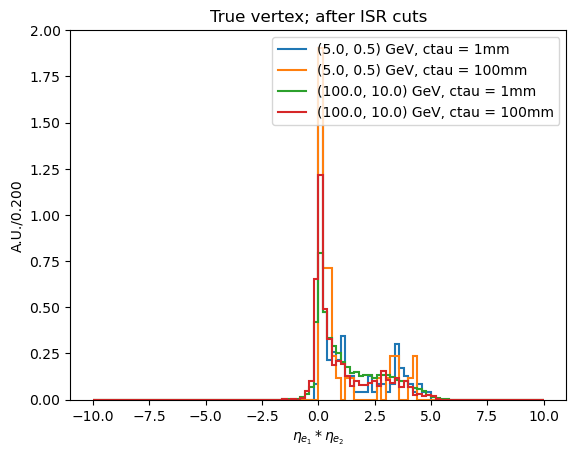

In [10]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_prod_eta',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)

plt.title('True vertex; after ISR cuts')
plt.legend()
plt.show()

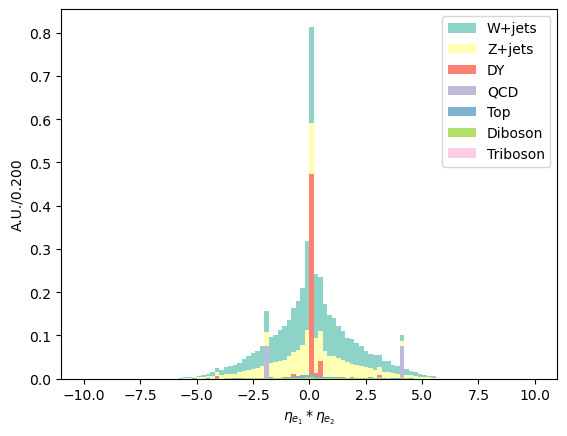

In [11]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### sel_vtx_chi2
Goodness of the fit. Random crossing tracks are likely to have big chi2 values, unless they have a very overestimated uncertainty (possible).

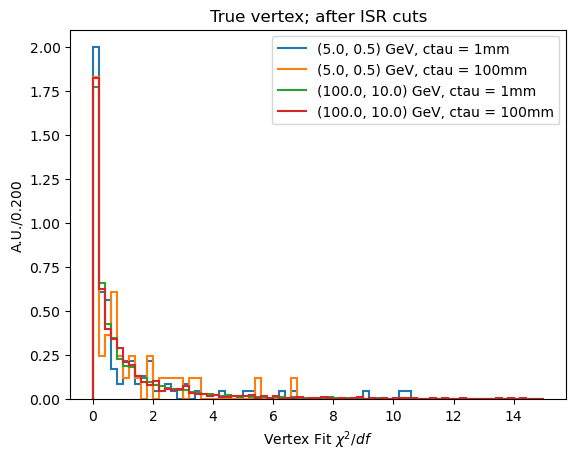

In [30]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_chi2',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,15],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)

plt.title('True vertex; after ISR cuts')
plt.legend()
plt.show()

/uscms/home/kyungmip/nobackup/miniconda3/envs/coffea/lib/python3.8/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


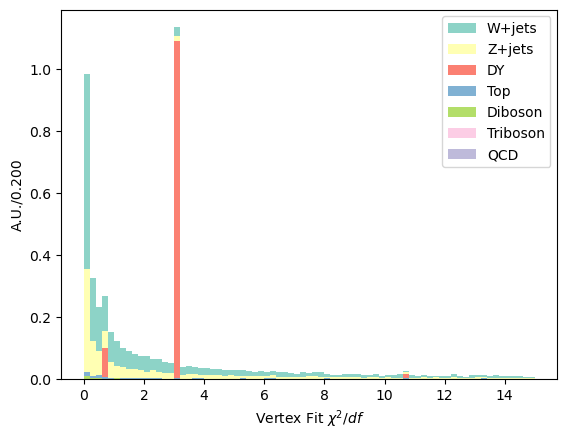

In [31]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

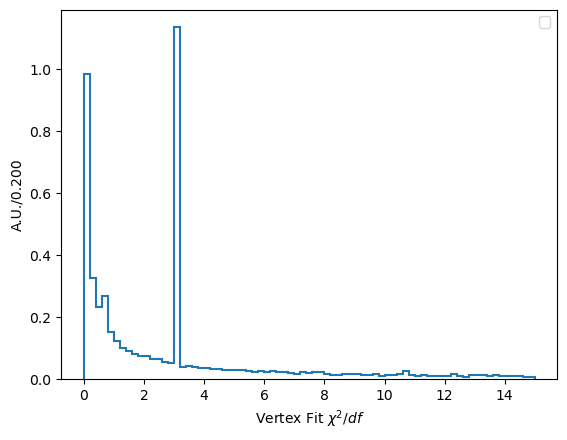

In [32]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d_stacked(ax, bkg_histos, plot_dict, style_dict)

### sel_vtx_METdPhi
Di-electron vertex and MET should be collimated, as the system is boosted against the recoiling ISR jet. The collimation depends on the mass of the chi1, which affects the mass of the vertex.

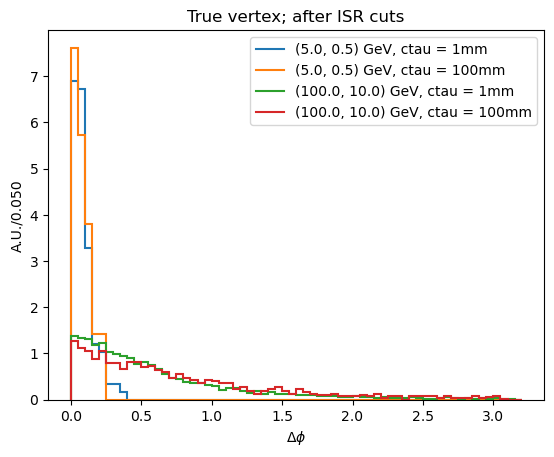

In [33]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_METdPhi',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)

plt.title('True vertex; after ISR cuts')
plt.legend()
plt.show()

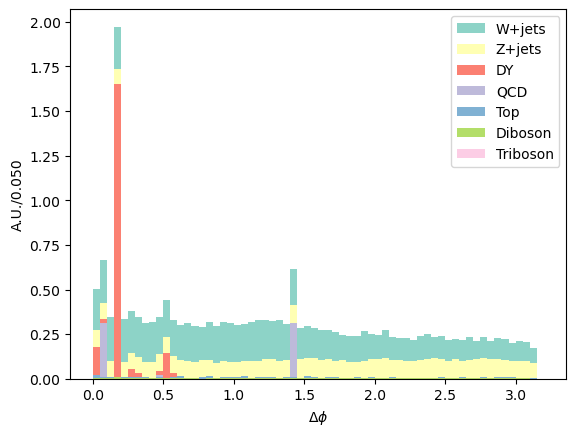

In [34]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict, processes='all')

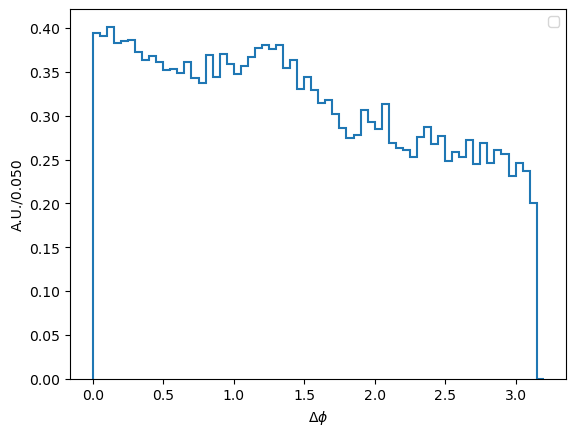

In [35]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d_stacked(ax, bkg_histos, plot_dict, style_dict, processes=['W+jets', 'Z+jets', 'Top', 'Diboson', 'Triboson'])

### sel_vtx_m
Mass of the vertex. 

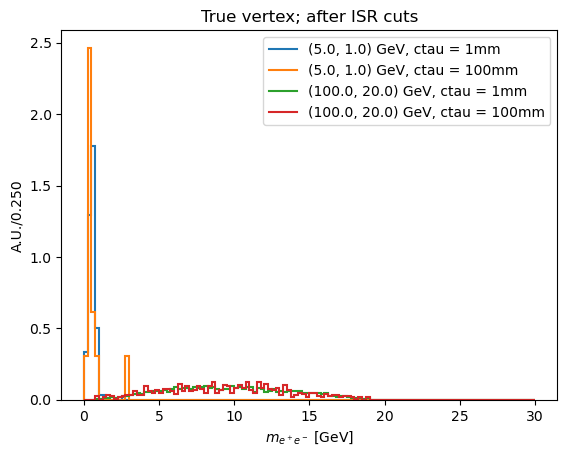

In [36]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 5j,
    'xlim': [0,30],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)

plt.title('True vertex; after ISR cuts')
plt.legend()
plt.show()

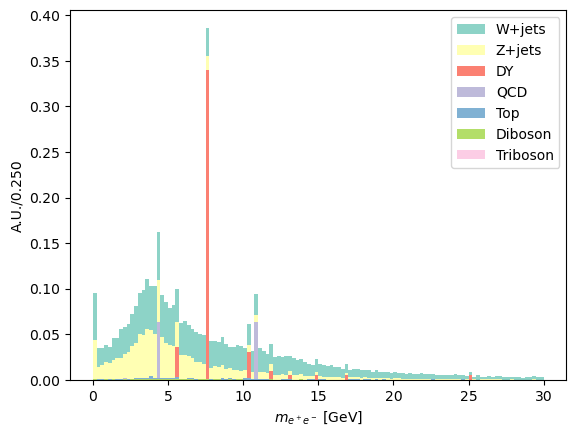

In [37]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict, processes='all')

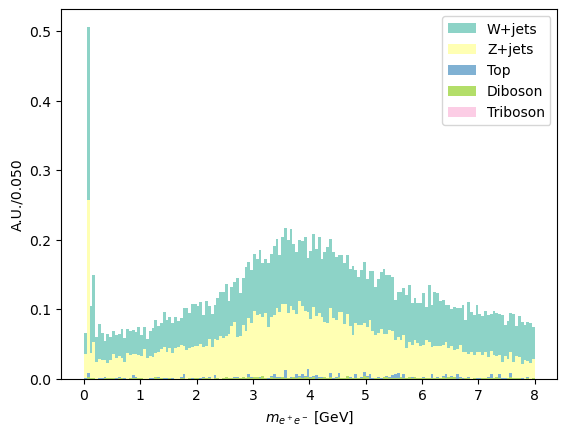

In [38]:
fig, ax = plt.subplots()

style_dict['rebin'] = 1j
style_dict['xlim'] = [0,8]

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict, processes=['W+jets', 'Z+jets', 'Top', 'Diboson', 'Triboson'])

### sel_vtx_dR
dR between the electrons that form the vertex. This should be small for the signal (depends on the chi1 mass of course), whereas for the background it could be all over the place. It is very correlated with mass.

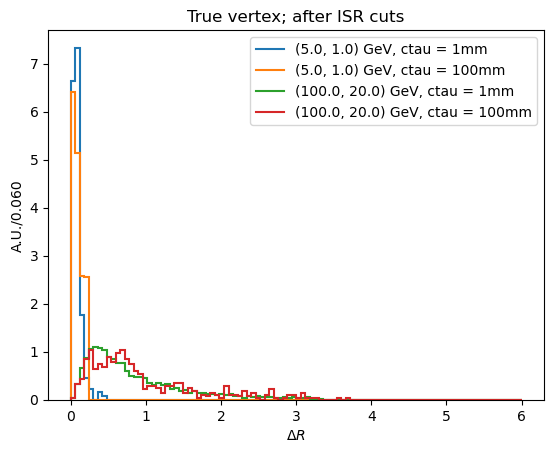

In [39]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dR',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)

plt.title('True vertex; after ISR cuts')
plt.legend()
plt.show()

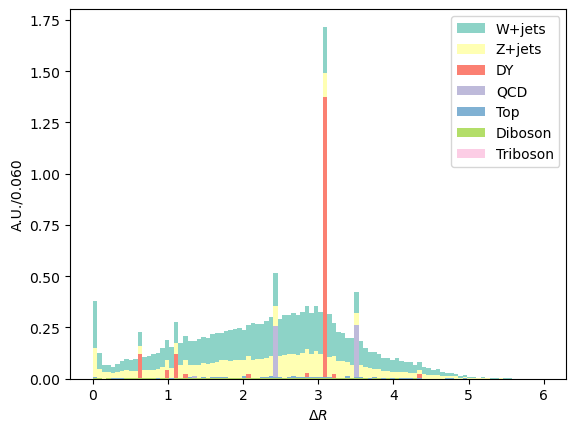

In [40]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict, processes='all')

### sel_vtx_minDxy
Both electrons that form the displaced vertex should be truly displaced, meaning that their impact parameter is also displaced. If a background has a "fake" displaced vertex by random track crossing for example, imposing the cut on the displacement of the impact parameters of both electrons should work.

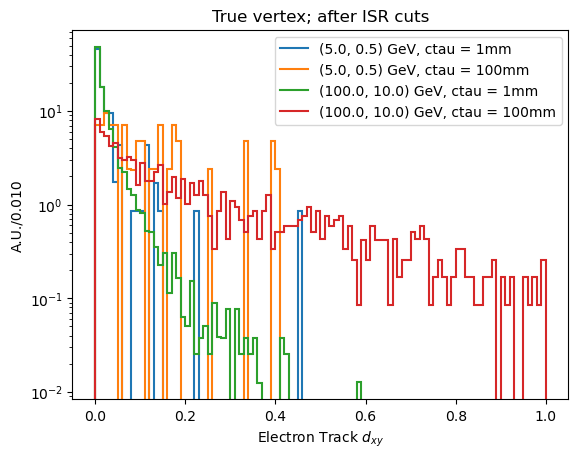

In [41]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_minDxy',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 10j,
    'xlim': [0,1],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)

plt.title('True vertex; after ISR cuts')
plt.legend()
plt.show()

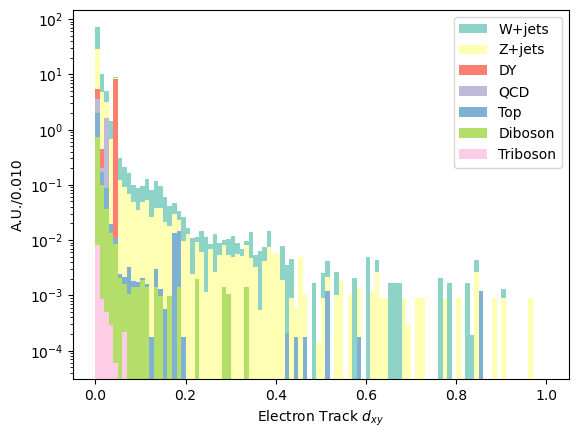

In [42]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict, processes='all')

### met_over_lead_jet_pt
Ratio between MET and leading ISR jet pT. For the signal, MET is composed of: two chi1s, ISR recoiling momentum. Depending on the chi1 mass, MET/leading jet pT ratio could be very close to 1 or not. 

For background, MET could be a genuine MET from neutrinos but also "fake" MET from jet momentum mismeasurement, although this "fake" MET should go away with dPhi(MET, jet) cut. 

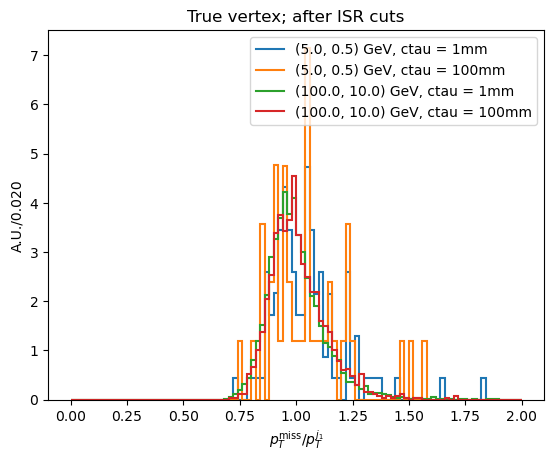

In [43]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'met_over_lead_jet_pt',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)

plt.title('True vertex; after ISR cuts')
plt.legend()
plt.show()

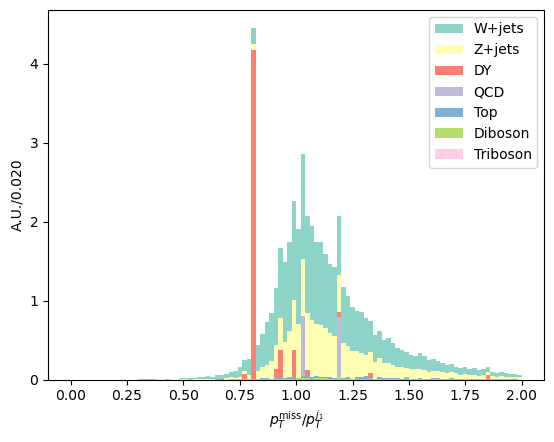

In [44]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict, processes='all')

### sel_vtx_vxy
Euclidean distance between PV and SV. Sometimes there are "fake" Lxy in the backgrounds, so we also  make use of other Lxy-driven variables.

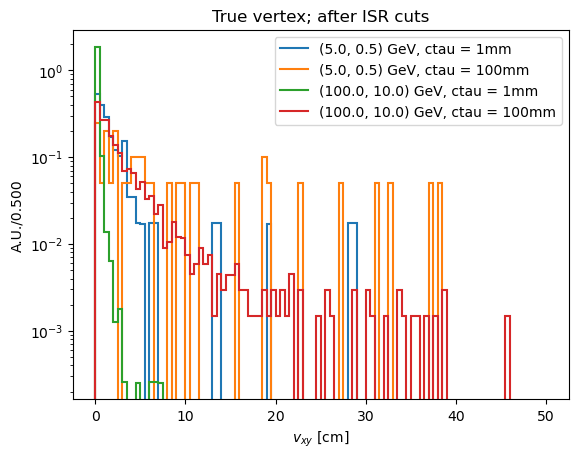

In [45]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 20j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)

plt.title('True vertex; after ISR cuts')
plt.legend()
plt.show()

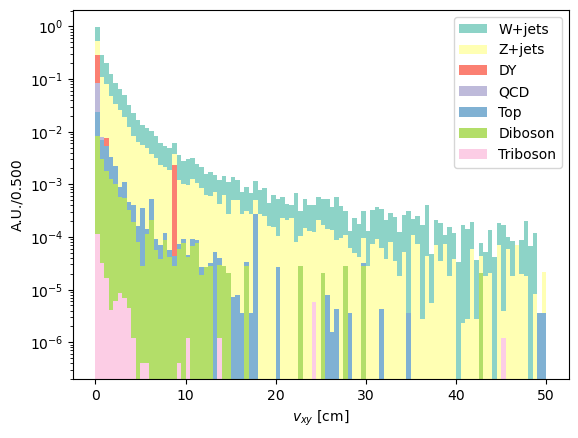

In [46]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict, processes='all')

### sel_vtx_vxySignif
Lxy significance = Lxy/sigma(Lxy); Take into account the fact that high Lxy has poor resolution.

Caveat is that sometimes sigma(Lxy) is "too" large, especially with two electrons' resolution convoluted, leading to very small significance at high Lxy.

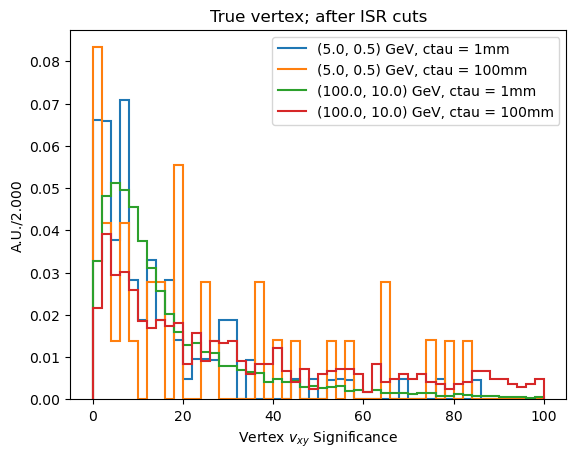

In [47]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxySignif',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)

plt.title('True vertex; after ISR cuts')
plt.legend()
plt.show()

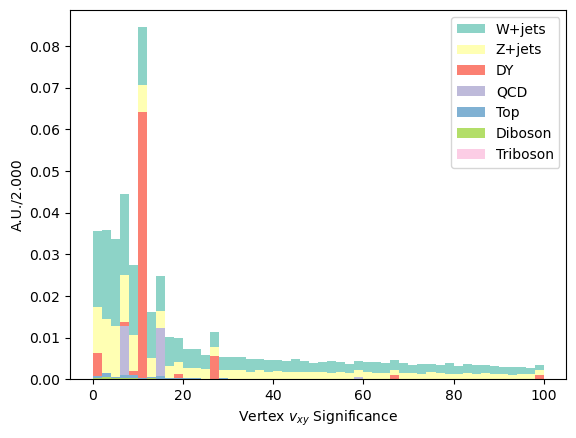

In [48]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict, processes='all')

### cos_collinear
Collinearity angle between chi2 and the di-electron vertex. This is calculated by using the dot product of vtx position vector and momentum vector. 

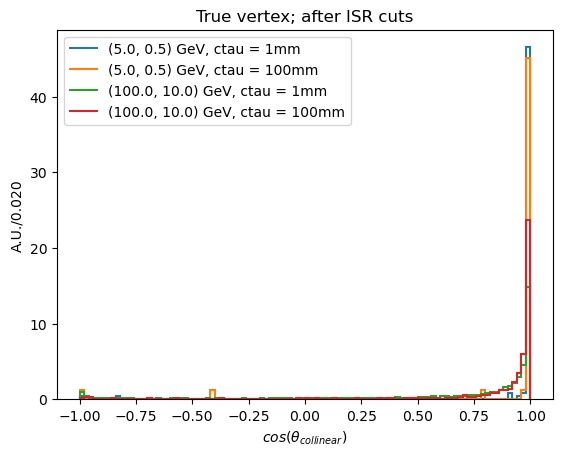

In [49]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'cos_collinear',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 10j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)

plt.title('True vertex; after ISR cuts')
plt.legend()
plt.show()

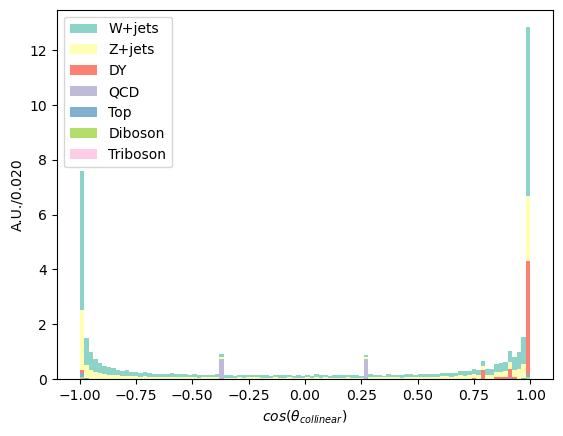

In [50]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict, processes='all')

### projectedLxy
Lxy projected onto di-electron pT vector.

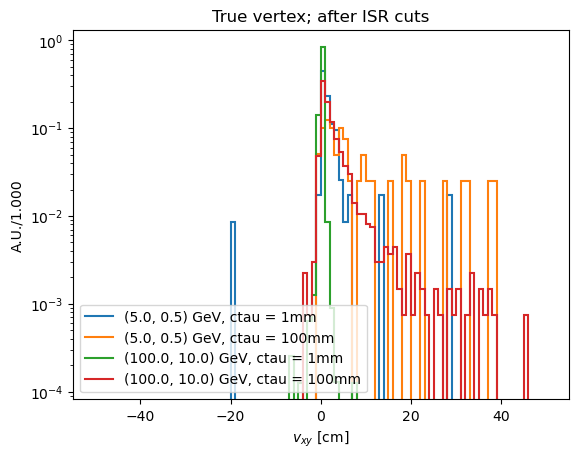

In [51]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'projectedLxy',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 40j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)

plt.title('True vertex; after ISR cuts')
plt.legend()
plt.show()

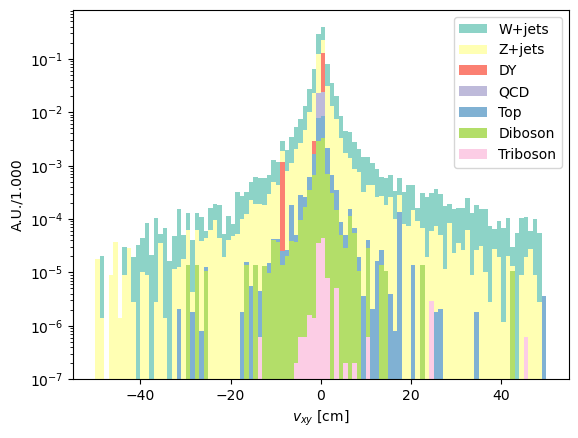

In [52]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict, processes='all')

### sel_vtx_pt_e1_over_pt_e2

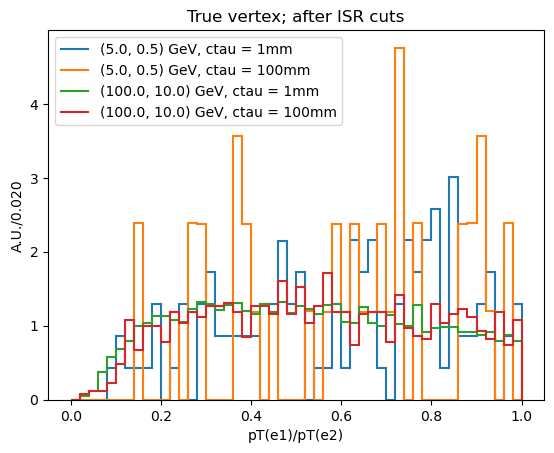

In [13]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_pt_e1_over_pt_e2',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': [0,1],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': 'pT(e1)/pT(e2)',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)

plt.title('True vertex; after ISR cuts')
plt.legend()
plt.show()

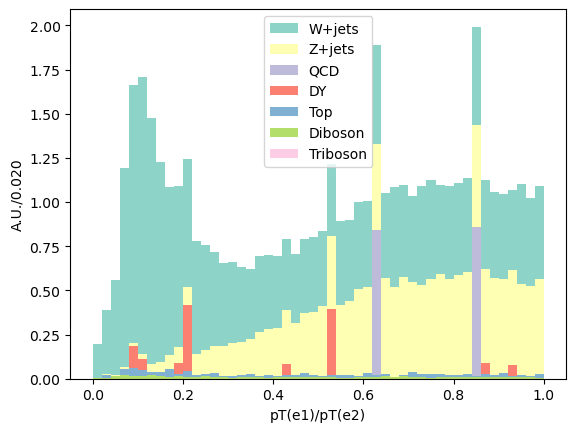

In [54]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict, processes='all')

### sel_vtx_pt_over_m

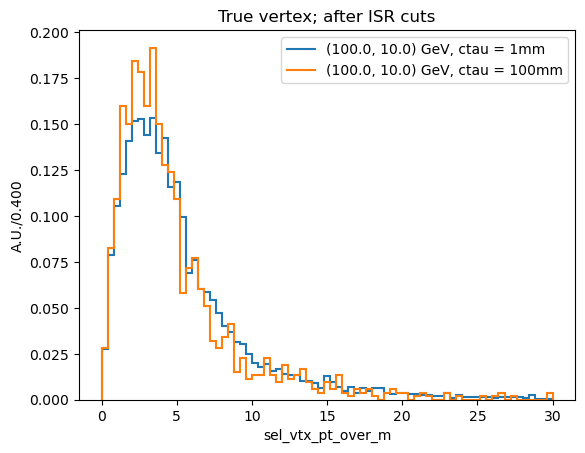

In [55]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_pt_over_m',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': [0,30],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [100]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)

plt.title('True vertex; after ISR cuts')
plt.legend()
plt.show()

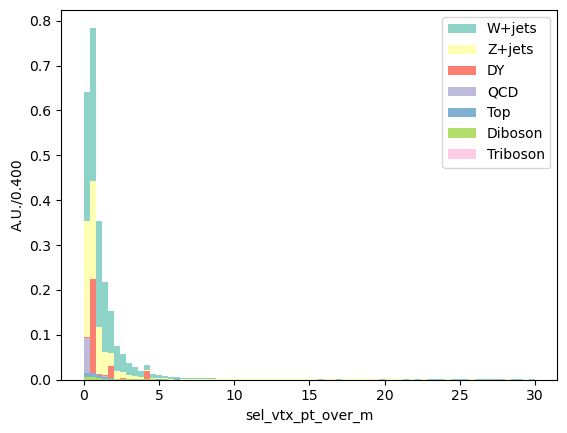

In [56]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict, processes='all')

### delta_dxy_over_maxdxy
Signal would have both electron's dxy values large & close together.

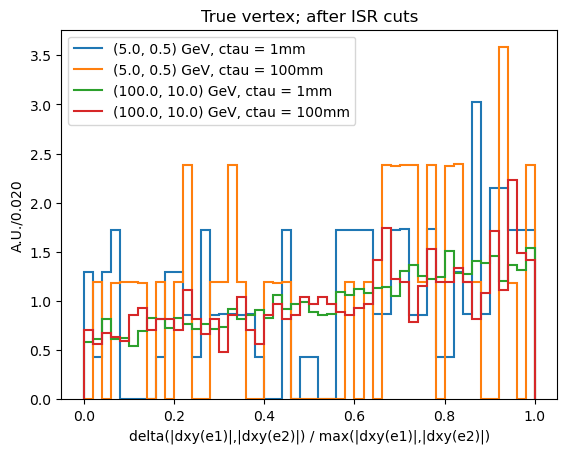

In [57]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'delta_dxy_over_maxdxy',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': [0,1],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': 'delta(|dxy(e1)|,|dxy(e2)|) / max(|dxy(e1)|,|dxy(e2)|)',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)

plt.title('True vertex; after ISR cuts')
plt.legend()
plt.show()

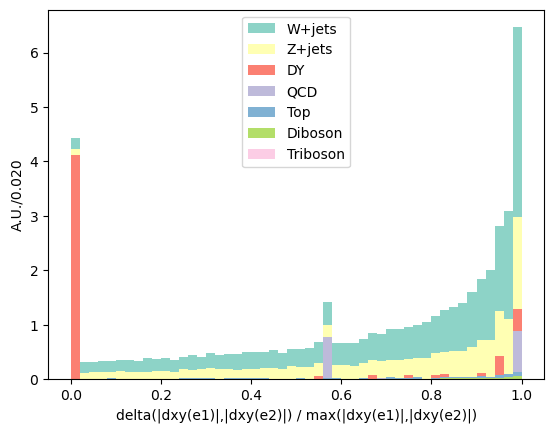

In [58]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict, processes='all')

### sel_vtx_dEta

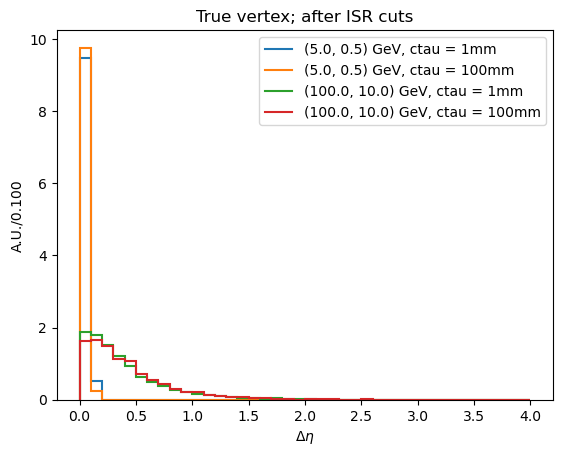

In [59]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dEta',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,4],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)

plt.title('True vertex; after ISR cuts')
plt.legend()
plt.show()

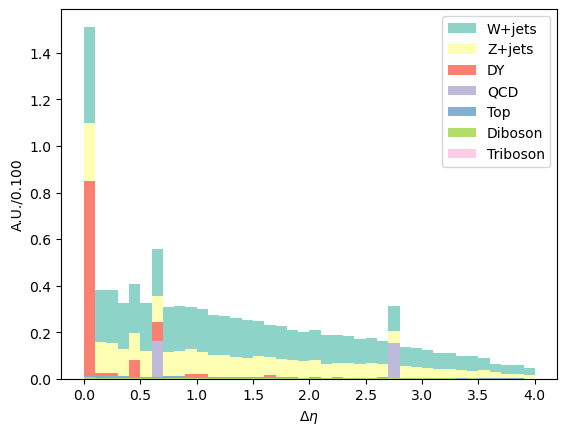

In [60]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict, processes='all')

### sel_vtx_dPhi

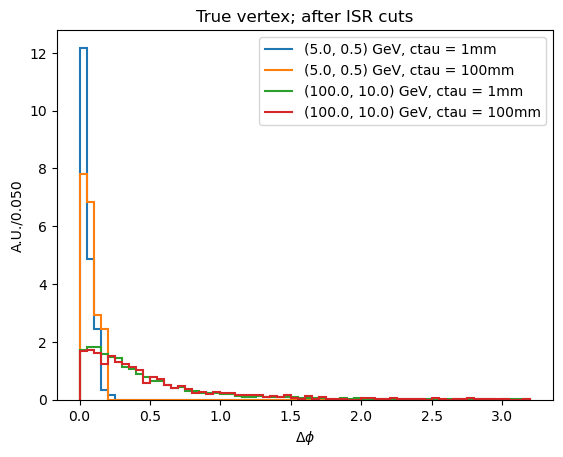

In [61]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dPhi',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)

plt.title('True vertex; after ISR cuts')
plt.legend()
plt.show()

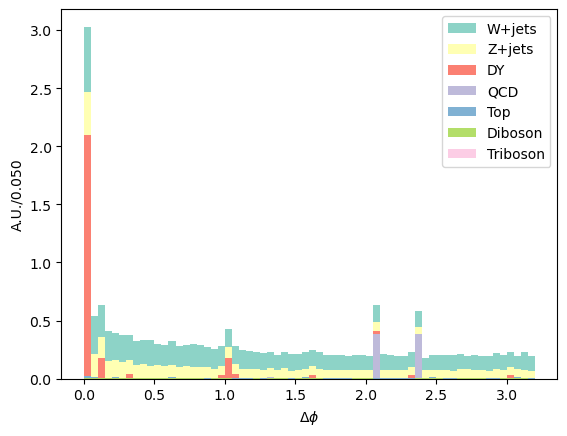

In [62]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict, processes='all')

### sel_vtx_dEta_over_dPhi

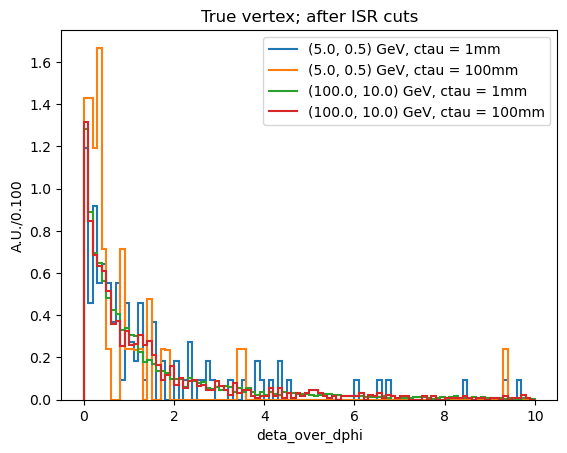

In [63]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dEta_over_dPhi',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 5j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)

plt.title('True vertex; after ISR cuts')
plt.legend()
plt.show()

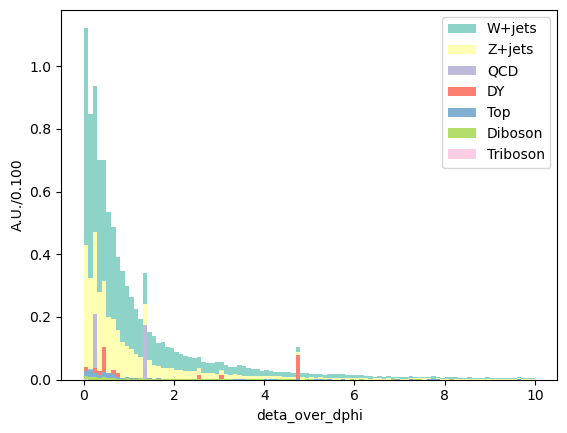

In [64]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict, processes='all')

### sel_vtx_log_dEta_over_dPhi

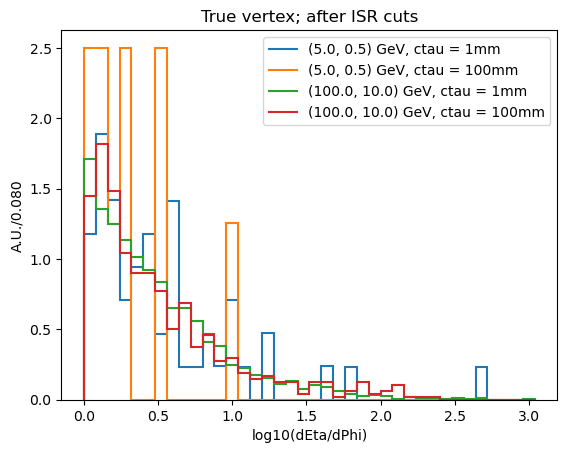

In [18]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_log_dEta_over_dPhi',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 4j,
    'xlim': [0,3],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': 'log10(dEta/dPhi)',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)

plt.title('True vertex; after ISR cuts')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict, processes='all')

### sel_vtx_type

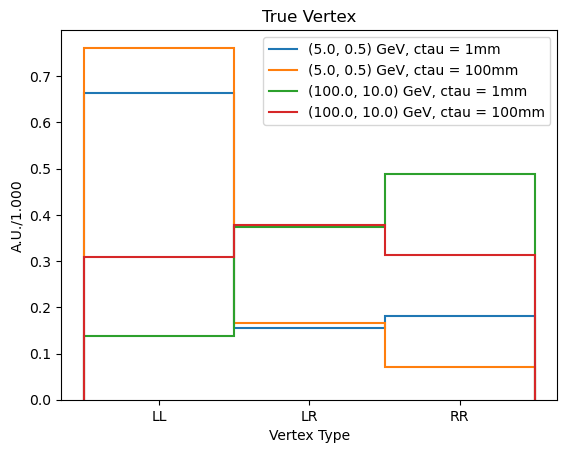

In [156]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_type',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5,100]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Vertex')
plt.legend()
plt.show()

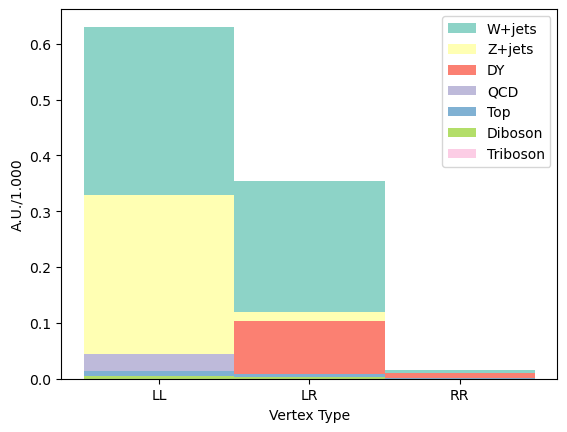

In [157]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

# Plot 2D

Text(0.5, 1.0, 'All Background')

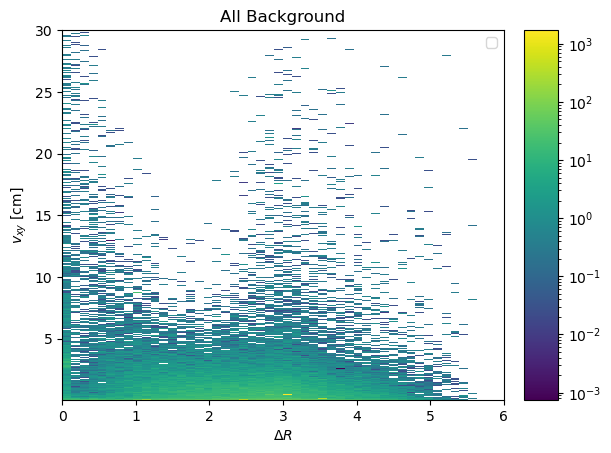

In [159]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dR_vs_sel_vtx_vxy',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 2j,
    'yrebin': 2j,
    'xlim': [0,30],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': [0,30],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

fig, ax = plt.subplots()

utils.plot_bkg_2D(ax, bkg_histos, plot_dict, style_2d_dict)

plt.title('All Background')
#utils.plot_bkg_2D(ax, bkg_histos, plot_dict, style_2d_dict, processes = ['Z+jets', 'W+jets', 'DY'])


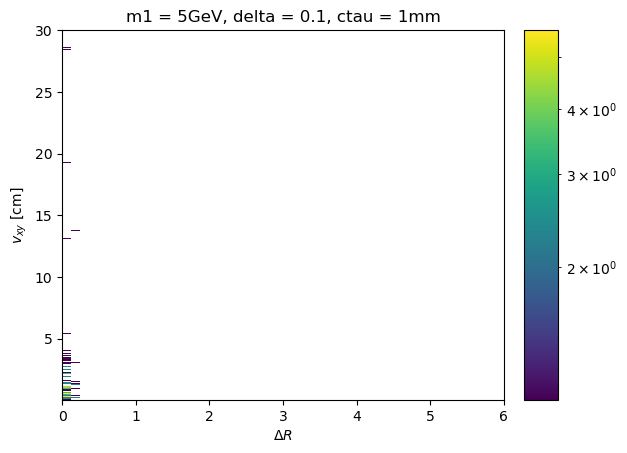

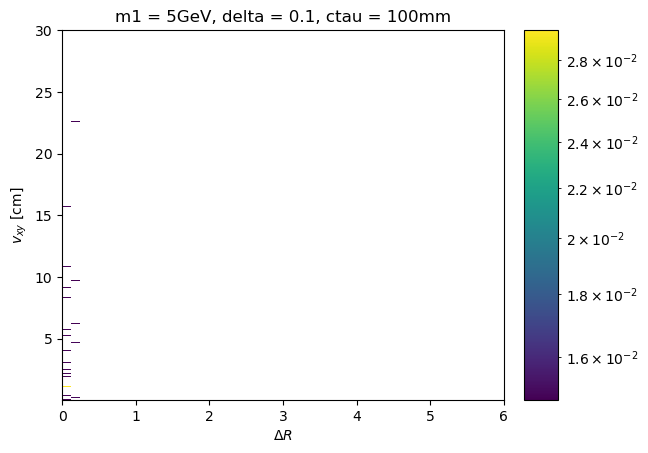

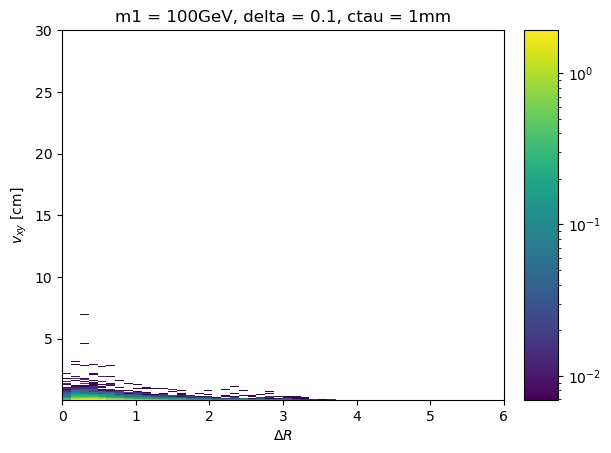

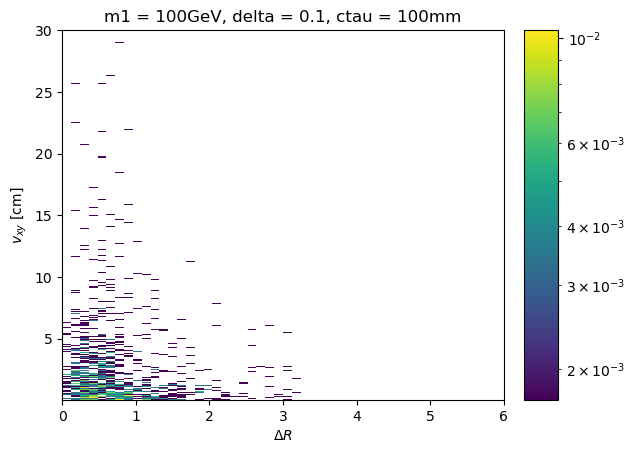

In [161]:

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()